# Estimating Contaminant Transport During Seasons of High Discharge in East Palistine, OH

## Introduction
At the end of Feburary, East Palistine, Ohio experienced a large chemical spill of poly-vinyl chloride. Most of the chemical was burned, causing it to vaporize into the air and be transported back into the water ways through precipitation, but a significant amount made it into the immediate groundwater and surrounding waterways. Because of the timing of the spill, it is relevant to consider the impact of elevated precipitation and discharge trends that occur during the spring season.

## Research Question
This analysis estimates the the average daily flow given observed discharge and precipiation measurements taken during the spring season (March - June). By finding the average daily flow, it will be possible to estimate how much seasonal precipitation and discharge will affect the dispersion of contaminants from the chemical spill in East Palestine. My hypothesis is that the trends of snow melting and high precipitation in the Spring will affect the dispersion of the chemicals, and they will spread faster during these months.

## Study Site

This analysis uses daily discharge data from USGS from the Little Beaver Creek near East Liverpool, OH, and Mahoning River in Youngstown, OH, and daily precipitation data from NCEI from the Youngstown Warren Region Airport, OH, and Warren, OH gauges. East Palestine is within the bounds of these two watersheds, and they make up the upper and lower half of the river that is being affected, and the precipitation data is upstream of both discharge gauges, so relevant data pertaining to the contaminantion in East Palistine will be presented.

## Data Sets

First Precipitaion data file: Daily precipitation data from NCEI from the Youngstown Warren Region Airport, OH guage
    https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00014852/detail
Second Precipiation data file: Daily precipitation data from NCEI from the Warren, OH guage
    https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USC00338769/detail
First discharge data file: Daily discharge data from USGS from the Little Beaver Creek near East Liverpool, OH 
    https://waterdata.usgs.gov/monitoring-location/03109500/#parameterCode=00065&period=P7D
Second discharge data file: Daily discharge data from USGS from the Mahoning River in Youngstown, OH
    https://waterdata.usgs.gov/monitoring-location/03098600/#parameterCode=00065&period=P365D

## Loading Initial Data and Creating Time Series Plot
Using this data, the seasonal trends between precipitation and discharge are able to be observed and quanitified, allowing for estimates between discharge speed and the number of days since a precipitation event to be presented as advisory warnings for water treatment plants potentially dealing with contaminant spills.

In [1]:
"""Load and plot discharge and precipitation data for a watershed.
​
This script reads comma-separated data files (.txt or .csv) containing precipiation and discharge
data abouta river or creek...
​
Parameters
----------
precip_1 : str
    The name of the first precipitation data file to be analyzed; must be in working 
    directory
precip_2: str
    The name of the second precipitation data file to be analyzed; must be in working directory
dis_1 : str
    The name of the first discharge data file to be analyzed; must be in working 
    directory
dis_2 : str
    The name of the second discharge data file to be analyzed; must be in working 
    directory
guage_1: str
    The name of the first discharge data site guage height file to be analyzed; must be in working directory
guage_2: str
    The name of the second discharge data site guage height file to be analyzed; must be in working directory
cross_area : int
    Cross sectional area of river in sqauare miles (ft2), which will be used in calculations   
start_date (yyyy-mm-dd) : str
    The start date of the study period
end_date (yyyy-mm-dd) : str
    The end date of the study period
duration : int
    Number of years the study covers
    
@author = Noah Waldron
@date = 2023-02-02
@license = MIT -- https://opensource.org/licenses/MIT
"""

'Load and plot discharge and precipitation data for a watershed.\n\u200b\nThis script reads comma-separated data files (.txt or .csv) containing precipiation and discharge\ndata abouta river or creek...\n\u200b\nParameters\n----------\nprecip_1 : str\n    The name of the first precipitation data file to be analyzed; must be in working \n    directory\nprecip_2: str\n    The name of the second precipitation data file to be analyzed; must be in working directory\ndis_1 : str\n    The name of the first discharge data file to be analyzed; must be in working \n    directory\ndis_2 : str\n    The name of the second discharge data file to be analyzed; must be in working \n    directory\nguage_1: str\n    The name of the first discharge data site guage height file to be analyzed; must be in working directory\nguage_2: str\n    The name of the second discharge data site guage height file to be analyzed; must be in working directory\ncross_area : int\n    Cross sectional area of river in sqauare

In [2]:
#Import libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
#Specify Parameters
precip_1 = 'youngstown_precip.csv'
precip_2 = 'warren_precip.csv'

dis_1 = 'mahoning_dis.txt'
dis_2 = 'lbc_dis.txt'

#Cross sectional stream area in ft2 (TBD)
#watershed_area = 

start_date = '1988-01-01'
end_date = '2022-12-31'
duration = 34

fig_title1 = ' East Ohio Precipitation vs Discharge'

In [4]:
#Load first precipitation data
data_p1 = pd.read_csv(precip_1, 
                   parse_dates=['DATE'], index_col=['DATE'], 
                   comment = '#', na_values = ['Ice','Bkw','SSN'])

In [5]:
#Replace missing values
data_p1.replace([np.nan,'9999'], 0, inplace = True)

In [6]:
#Integrate precipitation data with MDPR data and drop MDPR column
if 'MDPR' in data_p1.columns.tolist():
    data_p1['PRCP']=data_p1['PRCP']+data_p1['MDPR']
    data_p1.drop(columns = {'MDPR'}, inplace=True)

In [7]:
#Delete unecessary columns
data_p1.drop(columns = {'STATION','NAME'}, inplace = True)
if 'DAPR' in data_p1.columns.tolist():
    data_p1.drop(columns = {'DAPR'}, inplace = True)
if 'SNOW' in data_p1.columns.tolist():
    data_p1.drop(columns = {'SNOW'}, inplace = True)
if 'SNWD' in data_p1.columns.tolist():
    data_p1.drop(columns = {'SNWD'}, inplace = True)

In [8]:
#Rename precipitation column to display units
data_p1.rename(columns = {'PRCP':'precipitation1_inday'}, inplace = True)

In [9]:
#Load second precipitation data
data_p2 = pd.read_csv(precip_2, 
                   parse_dates=['DATE'], index_col=['DATE'], 
                   comment = '#', na_values = ['Ice','Bkw','SSN'])

In [10]:
#Replace missing values
data_p2.replace([np.nan,'9999'], 0, inplace = True)

In [11]:
#Integrate precipitation data with MDPR data and drop MDPR column
if 'MDPR' in data_p2.columns.tolist():
    data_p2['PRCP']=data_p2['PRCP']+data_p2['MDPR']
    data_p2.drop(columns = {'MDPR'}, inplace=True)

In [12]:
#Delete unecessary columns
data_p2.drop(columns = {'STATION','NAME'}, inplace = True)
if 'DAPR' in data_p2.columns.tolist():
    data_p2.drop(columns = {'DAPR'}, inplace = True)
if 'SNOW' in data_p2.columns.tolist():
    data_p2.drop(columns = {'SNOW'}, inplace = True)
if 'SNWD' in data_p2.columns.tolist():
    data_p2.drop(columns = {'SNWD'}, inplace = True)

In [13]:
#Rename precipitation column to display units
data_p2.rename(columns = {'PRCP':'precipitation2_inday'}, inplace = True)

In [14]:
# Load  first discharge data
data_q1 = pd.read_csv(dis_1, 
                   parse_dates = ['20d'], index_col = ['20d'],
                   comment = '#', delimiter = '\t', header = 1, na_values = ['Ice','Bkw','SSN'])

In [15]:
#Delete unecessary columns
data_q1.drop(columns = {'5s','15s','10s'}, inplace = True)

In [16]:
#Rename discharge column to display units
data_q1.rename(columns = {'14n' : 'discharge1_ft3s'}, inplace = True)
data_q1.rename(columns = {'20d' : 'DATE'}, inplace = True)

In [17]:
# Load second discharge data
data_q2 = pd.read_csv(dis_2, 
                   parse_dates = ['20d'], index_col = ['20d'],
                   comment = '#', delimiter = '\t', header = 1, na_values = ['Ice','Bkw','SSN'])

In [18]:
#Delete unecessary columns
data_q2.drop(columns = {'5s','15s','10s'}, inplace = True)

In [19]:
#Rename column to display units
data_q2.rename(columns = {'14n' : 'discharge2_ft3s'}, inplace = True)
data_q2.rename(columns = {'20d' : 'DATE'}, inplace = True)

In [20]:
# Merge precipitation and discharge data
data_p = pd.merge(data_p1, data_p2, left_index = True, right_index = True)
data_q = pd.merge(data_q1, data_q2, left_index = True, right_index = True)  
data = pd.merge(data_p, data_q, left_index = True, right_index = True)  

In [21]:
# Trim data to start and end dates
data = data[start_date:end_date]

Text(0, 0.5, 'Discharge (ft3/s)')

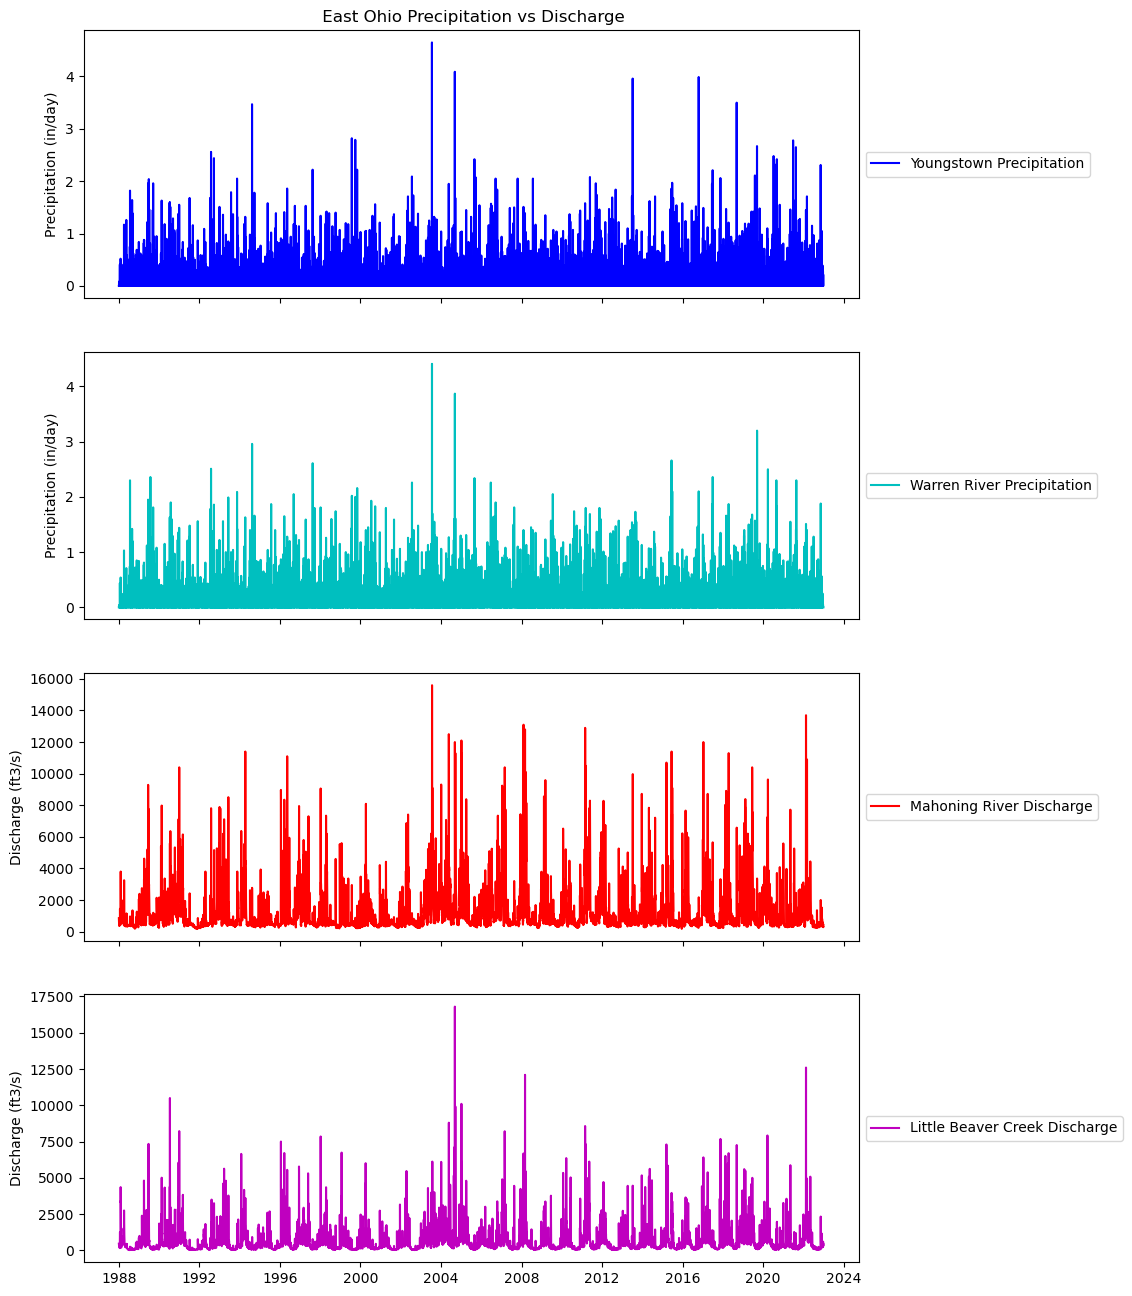

In [22]:
#Plot raw data
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (10,16), sharex = True)

ax1.plot(data['precipitation1_inday'], 'b-', label = 'Youngstown Precipitation')
ax1.legend(loc = 'center left', bbox_to_anchor = (1.0,0.5))
ax1.set_ylabel('Precipitation (in/day)')

ax1.set_title(fig_title1)

ax2.plot(data['precipitation2_inday'], 'c-', label = 'Warren River Precipitation')
ax2.legend(loc = 'center left', bbox_to_anchor = (1.0,0.5))
ax2.set_ylabel('Precipitation (in/day)')


ax3.plot(data['discharge1_ft3s'], 'r-', label = 'Mahoning River Discharge')
ax3.legend(loc = 'center left', bbox_to_anchor = (1.0,0.5))
ax3.set_ylabel('Discharge (ft3/s)')

ax4.plot(data['discharge2_ft3s'],'m-', label = 'Little Beaver Creek Discharge')
ax4.legend(loc = 'center left', bbox_to_anchor = (1.0,0.5))
ax4.set_ylabel('Discharge (ft3/s)')

## Separate Data into Seasons

By separating the data into seasons, and finding the average number of days between peak precipitation events and peak discharge measurements, it is possible to estimate the number of days a treatment plant has to buffer their operations in anticipation of recieving contaminated water in their influent, depending on the season and depending on how recently it rained

In [ ]:
#%% Creating the Fall Data Frame
#Create new data frame

#data.loc index by month

#%% Time series plot of Precipitiation and Discharge

#%%Calculations
#Use find peaks for precipitation and discharge, 
#create for loop to find number of days apart 
#precipitation peak  from discharge peak is, 
#use to estimate number of days for advisory

In [ ]:
#%% Creating the Winter Data Frame
#Create new data frame

#data.loc index by month

#%% Time series plot of Precipitiation and Discharge

#%%Calculations
#Use find peaks for precipitation and discharge, 
#create for loop to find number of days apart 
#precipitation peak  from discharge peak is, 
#use to estimate number of days for advisory


In [ ]:
#%% Creating the Spring Data Frame
#Create new data frame

#data.loc index by month

#%% Time series plot of Precipitiation and Discharge

#%%Calculations
#Use find peaks for precipitation and discharge, 
#create for loop to find number of days apart 
#precipitation peak  from discharge peak is, 
#use to estimate number of days for advisory

In [ ]:
#%% Creating the Summer Data Frame
#Create new data frame

#data.loc index by month

#%% Time series plot of Precipitiation and Discharge

#%%Calculations
#Use find peaks for precipitation and discharge, 
#create for loop to find number of days apart 
#precipitation peak  from discharge peak is, 
#use to estimate number of days for advisory

## Final Print Statements for Seasonal Advisory based on Time since Precipitation Event

## Conclusion
Hypothetically, there will be a shorter time frame for watertreatment facilities to act during the spring, compared to summer and winter.